In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 
import math

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_table("~/Documents/train.tsv")
print(train.shape)

(1482535, 8)


In [3]:
# Missing values
def mv(dataset):
    dataset.category_name.fillna(value="missing", inplace=True)
    dataset.brand_name.fillna(value="missing", inplace=True)
    dataset.item_description.fillna(value="missing", inplace=True)
    return (dataset)

train = mv(train)
print(train.shape)

(1482535, 8)


In [4]:
# Categorical data
le = LabelEncoder()

le.fit(np.hstack([train.category_name]))
train.category_name = le.transform(train.category_name)

le.fit(np.hstack([train.brand_name]))
train.brand_name = le.transform(train.brand_name)
del le

train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,808,4786,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,86,3557,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,1254,4180,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,485,4786,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,1181,4786,44.0,0,Complete with certificate of authenticity


In [5]:
# Text processing
from keras.preprocessing.text import Tokenizer
raw_text = np.hstack([train.item_description.str.lower(), train.name.str.lower()])

tok_raw = Tokenizer()
tok_raw.fit_on_texts(raw_text)

train["seq_item_description"] = tok_raw.texts_to_sequences(train.item_description.str.lower())
train["seq_name"] = tok_raw.texts_to_sequences(train.name.str.lower())

train.head()

Using TensorFlow backend.


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,seq_item_description,seq_name
0,0,MLB Cincinnati Reds T Shirt Size XL,3,808,4786,10.0,1,No description yet,"[12, 68, 79]","[3852, 8823, 6896, 208, 84, 6, 155]"
1,1,Razer BlackWidow Chroma Keyboard,3,86,3557,52.0,0,This keyboard is in great condition and works ...,"[29, 2627, 10, 7, 39, 17, 1, 207, 51, 19, 1113...","[10760, 25565, 16369, 2627]"
2,2,AVA-VIV Blouse,1,1254,4180,10.0,1,Adorable top with a hint of lace and a key hol...,"[604, 60, 9, 4, 5347, 11, 192, 1, 4, 886, 1290...","[7634, 10563, 666]"
3,3,Leather Horse Statues,1,485,4786,35.0,1,New with tags. Leather horses. Retail for [rm]...,"[5, 9, 61, 178, 6528, 230, 3, 21, 166, 1085, 2...","[178, 2610, 14248]"
4,4,24K GOLD plated rose,1,1181,4786,44.0,0,Complete with certificate of authenticity,"[807, 9, 6888, 11, 1997]","[4884, 104, 1032, 280]"


In [9]:
# Sequence variables
max_name_seq = np.max([np.max(train.seq_name.apply(lambda x: len(x)))])
max_seq_item_description = np.max([np.max(train.seq_item_description.apply(lambda x: len(x)))])
print("max name seq ",str(max_name_seq))
print("max item desc seq ",str(max_seq_item_description))

max name seq  17
max item desc seq  269


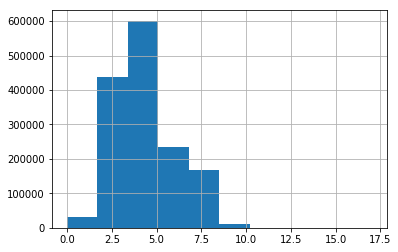

In [10]:
train.seq_name.apply(lambda x: len(x)).hist()

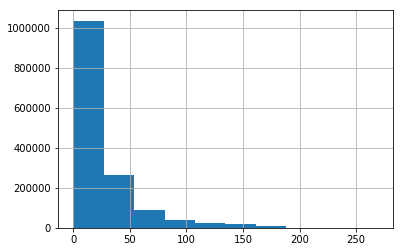

In [11]:
train.seq_item_description.apply(lambda x: len(x)).hist()

In [14]:
# Maximum values
# Base on the histograms, we select the next lengths
MAX_NAME_LEN = 10
MAX_ITEM_DESC_LEN = 100
MAX_TEXT = np.max([np.max(train.seq_name.max()), \
                   np.max(train.seq_item_description.max())])+2
MAX_CATEGORY = np.max([train.category_name.max()])+1
MAX_BRAND = np.max([train.brand_name.max()])+1
MAX_CONDITION = np.max([train.item_condition_id.max()])+1

/Users/CJL-RMBP/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x137edc320>]], dtype=object)

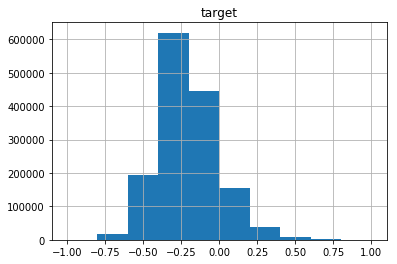

In [15]:
#SCALE target variable
train["target"] = np.log(train.price+1)
target_scaler = MinMaxScaler(feature_range=(-1, 1))
train["target"] = target_scaler.fit_transform(train.target.reshape(-1,1))
pd.DataFrame(train.target).hist()

In [18]:
print(train.shape)
train.head()

(1482535, 11)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,seq_item_description,seq_name,target
0,0,MLB Cincinnati Reds T Shirt Size XL,3,808,4786,10.0,1,No description yet,"[12, 68, 79]","[3852, 8823, 6896, 208, 84, 6, 155]",-0.369464
1,1,Razer BlackWidow Chroma Keyboard,3,86,3557,52.0,0,This keyboard is in great condition and works ...,"[29, 2627, 10, 7, 39, 17, 1, 207, 51, 19, 1113...","[10760, 25565, 16369, 2627]",0.044005
2,2,AVA-VIV Blouse,1,1254,4180,10.0,1,Adorable top with a hint of lace and a key hol...,"[604, 60, 9, 4, 5347, 11, 192, 1, 4, 886, 1290...","[7634, 10563, 666]",-0.369464
3,3,Leather Horse Statues,1,485,4786,35.0,1,New with tags. Leather horses. Retail for [rm]...,"[5, 9, 61, 178, 6528, 230, 3, 21, 166, 1085, 2...","[178, 2610, 14248]",-0.057699
4,4,24K GOLD plated rose,1,1181,4786,44.0,0,Complete with certificate of authenticity,"[807, 9, 6888, 11, 1997]","[4884, 104, 1032, 280]",0.000978


In [19]:
train.to_csv("~/Documents/10-100.csv",index=None)